### 230521 하은서 복습

#### 시계열 데이터
- 시간의 흐름 시간을 나타낸 것
- 시계열 분석
- datetime

In [1]:
import pandas as pd
import datetime

In [2]:
date = datetime.date( year=2023, month=5, day=21)
time = datetime.time(hour=22, minute=10, second=5, microsecond=1234)

In [3]:
date

datetime.date(2023, 5, 21)

In [4]:
time

datetime.time(22, 10, 5, 1234)

In [5]:
dt = datetime.datetime(year=2023, month=5, day=21,hour=22, minute=10, second=5, microsecond=1234 )
dt

datetime.datetime(2023, 5, 21, 22, 10, 5, 1234)

In [7]:
# timedelta 계산 가능
td = datetime.timedelta(days=20,hours=10)
td

datetime.timedelta(days=20, seconds=36000)

In [8]:
print(date+td)
print(dt+td)

2023-06-10
2023-06-11 08:10:05.001234


#### datetime 좋은점
- datetime을 이용해 시계열 데이터로 바꿈

In [9]:
pd.to_datetime('2023-05-21')

Timestamp('2023-05-21 00:00:00')

In [10]:
a = pd.Series(['2023-5-21','2023/5/21', '21/5/2023','2023-6-21','2023-07-19','2023-05-32'])

In [11]:
pd.to_datetime(a, dayfirst=True, errors='coerce')  # 에러의 경우 (= 정상적이지 않은 시계열 값) na 반환

0   2023-05-21
1   2023-05-21
2   2023-05-21
3   2023-06-21
4   2023-07-19
5          NaT
dtype: datetime64[ns]

#### 실제 데이터 분석 ( crime )

In [14]:
crime = pd.read_csv('crime.csv')
crime.head()

,Unnamed: 0,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,REPORTED_DATE,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
0,0,traffic-accident-dui-duid,traffic-accident,2014-06-29 02:01:00,-105.000149,39.745753,cbd,0,1
1,1,vehicular-eluding-no-chase,all-other-crimes,2014-06-29 01:54:00,-104.884660,39.738702,east-colfax,1,0
2,2,disturbing-the-peace,public-disorder,2014-06-29 02:00:00,-105.020719,39.706674,athmar-park,1,0
3,3,curfew,public-disorder,2014-06-29 02:18:00,-105.001552,39.769505,sunnyside,1,0
4,4,aggravated-assault,aggravated-assault,2014-06-29 04:17:00,-105.018557,39.679229,college-view-south-platte,1,0


In [15]:
crime.info()
# 문자열 데이터인 경우 시계열 데이터로 바꾸기

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460911 entries, 0 to 460910
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           460911 non-null  int64  
 1   OFFENSE_TYPE_ID      460911 non-null  object 
 2   OFFENSE_CATEGORY_ID  460911 non-null  object 
 3   REPORTED_DATE        460911 non-null  object 
 4   GEO_LON              457296 non-null  float64
 5   GEO_LAT              457296 non-null  float64
 6   NEIGHBORHOOD_ID      460911 non-null  object 
 7   IS_CRIME             460911 non-null  int64  
 8   IS_TRAFFIC           460911 non-null  int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 31.6+ MB


In [16]:
crime['REPORTED_DATE'] = pd.to_datetime(crime['REPORTED_DATE'])

In [17]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460911 entries, 0 to 460910
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Unnamed: 0           460911 non-null  int64         
 1   OFFENSE_TYPE_ID      460911 non-null  object        
 2   OFFENSE_CATEGORY_ID  460911 non-null  object        
 3   REPORTED_DATE        460911 non-null  datetime64[ns]
 4   GEO_LON              457296 non-null  float64       
 5   GEO_LAT              457296 non-null  float64       
 6   NEIGHBORHOOD_ID      460911 non-null  object        
 7   IS_CRIME             460911 non-null  int64         
 8   IS_TRAFFIC           460911 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 31.6+ MB


In [18]:
# 시계열 데이터 컬럼을 인덱스로 지정시 다양하게 사용 가능
crime_dt = crime.set_index('REPORTED_DATE')

In [19]:
crime_dt.loc['2015']


,Unnamed: 0,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,,
2015-12-18 23:51:00,1213,theft-of-motor-vehicle,auto-theft,-105.024694,39.708538,athmar-park,1,0
2015-11-16 14:59:00,1214,traffic-accident,traffic-accident,-105.050370,39.740281,west-colfax,0,1
2015-06-08 06:46:00,1215,traffic-accident,traffic-accident,-104.994822,39.768386,globeville,0,1
2015-09-30 12:15:00,1221,traffic-accident,traffic-accident,-105.014162,39.740439,lincoln-park,0,1
2015-04-10 11:47:00,1222,traffic-accident,traffic-accident,-104.982534,39.717430,speer,0,1
...,...,...,...,...,...,...,...,...
2015-12-08 13:09:00,435956,fraud-identity-theft,white-collar-crime,-105.064441,39.654373,bear-valley,1,0
2015-02-25 10:47:00,439679,theft-from-bldg,larceny,-104.687125,39.831870,dia,1,0
2015-12-24 13:56:00,442801,theft-other,larceny,-104.956983,39.665810,wellshire,1,0


In [22]:
crime_dt.loc['2016']

,Unnamed: 0,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,,
2016-01-13 15:26:00,1205,drug-hallucinogen-sell,drug-alcohol,-104.998843,39.741401,cbd,1,0
2016-03-28 14:01:00,1212,theft-shoplift,larceny,-104.847803,39.783106,montbello,1,0
2016-03-06 04:32:00,1237,traffic-accident-hit-and-run,traffic-accident,-104.983499,39.740860,north-capitol-hill,0,1
2016-02-04 14:42:00,1239,traffic-accident,traffic-accident,-104.966860,39.780128,elyria-swansea,0,1
2016-03-02 17:15:00,1249,criminal-mischief-mtr-veh,public-disorder,-104.841596,39.781756,montbello,1,0
...,...,...,...,...,...,...,...,...
2016-03-22 15:01:00,427190,fraud-identity-theft,white-collar-crime,-105.007622,39.746067,auraria,1,0
2016-08-10 14:00:00,427199,fraud-identity-theft,white-collar-crime,-105.005238,39.740155,lincoln-park,1,0
2016-01-28 13:47:00,437718,violation-of-restraining-order,all-other-crimes,-104.994883,39.730313,lincoln-park,1,0


In [23]:
# 요일 지정 가능
crime_dt.loc['2015-08']

,Unnamed: 0,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,,
2015-08-06 08:39:00,1227,aggravated-assault-dv,aggravated-assault,-104.857357,39.659293,kennedy,1,0
2015-08-05 13:34:00,1228,assault-dv,other-crimes-against-persons,-104.994715,39.739737,civic-center,1,0
2015-08-01 21:58:00,1304,burglary-residence-no-force,burglary,-104.889757,39.662554,hampden,1,0
2015-08-17 11:43:00,1373,theft-of-motor-vehicle,auto-theft,-105.005849,39.778099,sunnyside,1,0
2015-08-24 08:45:00,1400,theft-items-from-vehicle,theft-from-motor-vehicle,-104.943390,39.681332,university-park,1,0
...,...,...,...,...,...,...,...,...
2015-08-11 19:54:00,378994,assault-simple,other-crimes-against-persons,-104.880855,39.724706,lowry-field,1,0
2015-08-28 18:55:00,406853,sex-aslt-rape-pot,sexual-assault,NaN,NaN,college-view-south-platte,1,0
2015-08-26 20:10:00,416417,sex-off-fail-to-register,all-other-crimes,-104.992316,39.737154,civic-center,1,0


In [24]:
crime_dt.loc['2015-08-11']

,Unnamed: 0,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,,
2015-08-11 21:15:00,2978,theft-other,larceny,-104.982888,39.743153,north-capitol-hill,1,0
2015-08-11 16:16:00,4158,theft-parts-from-vehicle,theft-from-motor-vehicle,-104.994672,39.752680,union-station,1,0
2015-08-11 15:11:00,80110,traffic-accident,traffic-accident,-105.025146,39.759366,highland,0,1
2015-08-11 13:39:00,82772,traf-other,all-other-crimes,-105.048298,39.657200,harvey-park-south,1,0
2015-08-11 17:09:00,84212,traf-other,all-other-crimes,-105.025110,39.718447,barnum,1,0
...,...,...,...,...,...,...,...,...
2015-08-11 07:15:00,356697,sex-aslt-rape-pot,sexual-assault,NaN,NaN,belcaro,1,0
2015-08-11 13:00:00,360846,threats-to-injure,public-disorder,-105.048959,39.734057,villa-park,1,0
2015-08-11 19:01:00,375216,assault-simple,other-crimes-against-persons,-104.906138,39.744564,south-park-hill,1,0


In [25]:
crime_dt.loc['Apr 2014']

,Unnamed: 0,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,,
2014-04-21 09:44:00,178,traffic-accident-hit-and-run,traffic-accident,-104.940628,39.749243,south-park-hill,0,1
2014-04-21 10:30:00,179,disturbing-the-peace,public-disorder,-104.980822,39.740291,north-capitol-hill,1,0
2014-04-21 10:39:00,180,police-interference,all-other-crimes,-105.042452,39.722651,barnum-west,1,0
2014-04-28 16:27:00,181,theft-other,larceny,-104.992106,39.778963,globeville,1,0
2014-04-28 17:29:00,183,traffic-accident,traffic-accident,-104.908134,39.701066,washington-virginia-vale,0,1
...,...,...,...,...,...,...,...,...
2014-04-21 12:06:00,432880,fraud-identity-theft,white-collar-crime,-104.850165,39.657705,kennedy,1,0
2014-04-25 17:02:00,434807,theft-parts-from-vehicle,theft-from-motor-vehicle,-104.960877,39.708683,washington-park,1,0
2014-04-22 09:34:00,440639,fraud-identity-theft,white-collar-crime,-104.991828,39.782888,globeville,1,0


In [26]:
crime_dt.loc['2014'].sort_index()

,Unnamed: 0,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,,
2014-01-01 00:08:00,99814,traf-other,all-other-crimes,-104.841945,39.773764,stapleton,1,0
2014-01-01 00:08:00,214696,traf-habitual-offender,all-other-crimes,-104.841945,39.773764,stapleton,1,0
2014-01-01 00:38:00,224109,theft-of-motor-vehicle,auto-theft,-104.890345,39.782623,stapleton,1,0
2014-01-01 00:39:00,83972,robbery-street,robbery,-104.979260,39.753859,five-points,1,0
2014-01-01 01:00:00,236308,aggravated-assault,aggravated-assault,-105.048852,39.731369,villa-park,1,0
...,...,...,...,...,...,...,...,...
2014-12-31 23:59:00,226091,weapon-carrying-concealed,all-other-crimes,-105.017647,39.718170,valverde,1,0
2014-12-31 23:59:00,148309,traffic-accident,traffic-accident,-105.040484,39.751199,sloan-lake,0,1
2014-12-31 23:59:00,97411,assault-dv,other-crimes-against-persons,-105.017647,39.718170,valverde,1,0


#### Between_time

In [27]:
crime_dt14 = crime_dt.loc['2014'].sort_index()

In [28]:
crime_dt14.between_time('13:00', '18:00')

,Unnamed: 0,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,,
2014-01-01 13:08:00,1251,traffic-accident,traffic-accident,-104.912616,39.651368,hampden-south,0,1
2014-01-01 13:54:00,146990,burglary-residence-no-force,burglary,-104.977279,39.694618,washington-park-west,1,0
2014-01-01 13:55:00,200314,burglary-business-by-force,burglary,-105.022611,39.792059,chaffee-park,1,0
2014-01-01 14:22:00,133765,liquor-possession,drug-alcohol,-104.973097,39.740032,capitol-hill,1,0
2014-01-01 14:28:00,137563,assault-dv,other-crimes-against-persons,-105.018501,39.782714,sunnyside,1,0
...,...,...,...,...,...,...,...,...
2014-12-31 17:35:00,215933,police-false-information,all-other-crimes,-104.942200,39.687050,cory-merrill,1,0
2014-12-31 17:54:00,228950,criminal-trespassing,all-other-crimes,-104.848459,39.771802,stapleton,1,0
2014-12-31 17:54:00,106949,disturbing-the-peace,public-disorder,-104.848459,39.771802,stapleton,1,0


In [29]:
# 해당 정각 시간에 대한 데이터 추출시
# at_time

crime_dt14.at_time('16:49')

,Unnamed: 0,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,,
2014-01-08 16:49:00,201010,traffic-accident,traffic-accident,-104.851718,39.768331,stapleton,0,1
2014-01-18 16:49:00,159782,traffic-accident,traffic-accident,-105.053239,39.733105,villa-park,0,1
2014-01-18 16:49:00,292755,theft-other,larceny,-105.004929,39.710900,athmar-park,1,0
2014-01-28 16:49:00,153133,traffic-accident,traffic-accident,-104.994952,39.765683,globeville,0,1
2014-02-04 16:49:00,229613,traffic-accident,traffic-accident,-104.884606,39.657791,hampden,0,1
...,...,...,...,...,...,...,...,...
2014-12-02 16:49:00,245051,theft-other,larceny,-104.999293,39.752085,union-station,1,0
2014-12-14 16:49:00,217437,burglary-business-by-force,burglary,-104.975748,39.740222,north-capitol-hill,1,0
2014-12-16 16:49:00,129733,theft-items-from-vehicle,theft-from-motor-vehicle,-105.025552,39.731396,villa-park,1,0


In [30]:
crime_dt14.first('5D')

,Unnamed: 0,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,,
2014-01-01 00:08:00,99814,traf-other,all-other-crimes,-104.841945,39.773764,stapleton,1,0
2014-01-01 00:08:00,214696,traf-habitual-offender,all-other-crimes,-104.841945,39.773764,stapleton,1,0
2014-01-01 00:38:00,224109,theft-of-motor-vehicle,auto-theft,-104.890345,39.782623,stapleton,1,0
2014-01-01 00:39:00,83972,robbery-street,robbery,-104.979260,39.753859,five-points,1,0
2014-01-01 01:00:00,236308,aggravated-assault,aggravated-assault,-105.048852,39.731369,villa-park,1,0
...,...,...,...,...,...,...,...,...
2014-01-05 23:21:00,248473,traffic-accident,traffic-accident,-104.979160,39.779675,globeville,0,1
2014-01-05 23:28:00,235140,weapon-carrying-concealed,all-other-crimes,-104.815367,39.793922,montbello,1,0
2014-01-05 23:28:00,235141,drug-cocaine-possess,drug-alcohol,-104.815367,39.793922,montbello,1,0


#### resample()

In [31]:
crime_sp14=crime_dt14[['IS_CRIME','IS_TRAFFIC']]
crime_sp=crime_dt14[['IS_CRIME']]

In [34]:
# 월별, 일별, 주별 값을 계산
crime_spw= crime_sp.resample('W').sum()
crime_spw.head()

,IS_CRIME
REPORTED_DATE,
2014-01-05,619
2014-01-12,1023
2014-01-19,1102
2014-01-26,1082
2014-02-02,917


In [36]:
crime_sp14.resample('W').sum().head()

,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,
2014-01-05,619,268
2014-01-12,1023,397
2014-01-19,1102,327
2014-01-26,1082,351
2014-02-02,917,439


In [37]:
crime_sp14.resample('M').sum().head()

,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,
2014-01-31,4557,1680
2014-02-28,4580,1646
2014-03-31,5350,1695
2014-04-30,5043,1671
2014-05-31,5401,1765


In [38]:
crime_sp14.resample('Y').sum()

,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,
2014-12-31,62690,21763


<Axes: xlabel='REPORTED_DATE'>

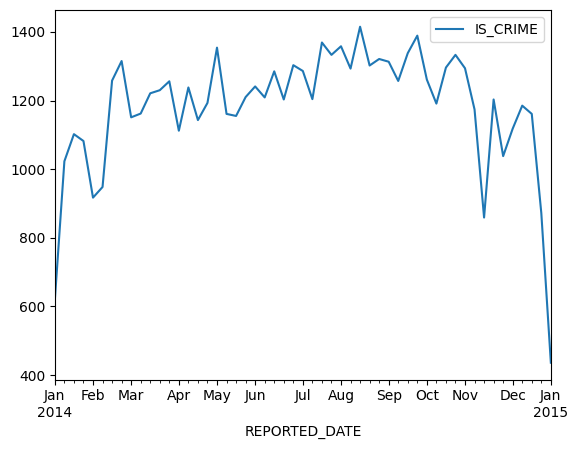

In [39]:
crime_spw.plot()